In [1]:
import numpy as np
import types
import collections
from random import shuffle
import PIL
from PIL import Image
import cupy as cp
from timeit import default_timer as timer
from matplotlib.pyplot import imshow
import cv2
import os
from tqdm.notebook import trange, tqdm
%matplotlib inline

In [2]:
file = "/mnt/optane-ssd/lipeng/imagenet/5000/train/n01443537/n01443537_10007.JPEG"

In [3]:
import torchvision.transforms as transforms
import torchvision.transforms.functional as fc
t1 = transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip()
        ])
t2 = transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor()
        ])
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
t3 = transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize
        ])


In [4]:
img = Image.open(file)# 读取图像

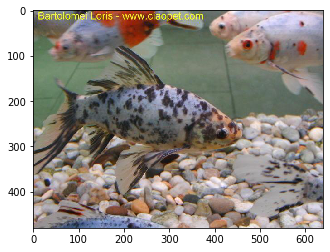

In [6]:
imshow(img)

In [7]:
tensor1 = t1(img)

In [8]:
tensor2 = t2(img)

In [9]:
tensor3 = t3(img)

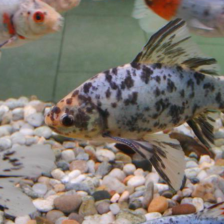

In [10]:
tensor1

In [11]:
tensor2

tensor([[[0.4275, 0.4275, 0.4275,  ..., 0.4196, 0.4157, 0.4196],
         [0.4078, 0.4078, 0.4157,  ..., 0.4157, 0.4235, 0.4275],
         [0.3961, 0.3961, 0.4078,  ..., 0.4157, 0.4196, 0.4235],
         ...,
         [0.7373, 0.7373, 0.7412,  ..., 0.6235, 0.6196, 0.6157],
         [0.7725, 0.7725, 0.7529,  ..., 0.6196, 0.6196, 0.6196],
         [0.7529, 0.7451, 0.7529,  ..., 0.6118, 0.6118, 0.6157]],

        [[0.4863, 0.4824, 0.4824,  ..., 0.5333, 0.5294, 0.5333],
         [0.4824, 0.4784, 0.4824,  ..., 0.5294, 0.5373, 0.5412],
         [0.4824, 0.4784, 0.4784,  ..., 0.5294, 0.5333, 0.5373],
         ...,
         [0.7098, 0.7176, 0.7255,  ..., 0.5882, 0.5804, 0.5725],
         [0.7412, 0.7490, 0.7333,  ..., 0.5804, 0.5804, 0.5765],
         [0.7176, 0.7216, 0.7333,  ..., 0.5725, 0.5765, 0.5725]],

        [[0.4157, 0.4118, 0.4118,  ..., 0.4157, 0.4118, 0.4157],
         [0.4196, 0.4196, 0.4235,  ..., 0.4118, 0.4196, 0.4235],
         [0.4275, 0.4275, 0.4275,  ..., 0.4118, 0.4157, 0.

In [12]:
tensor3

tensor([[[-1.1247, -0.6965, -0.2684,  ..., -0.3541, -0.3712, -0.3369],
         [-1.2274, -0.7650, -0.3198,  ..., -0.4911, -0.4739, -0.4054],
         [-1.1075, -0.6452, -0.1828,  ..., -0.8507, -0.7650, -0.6965],
         ...,
         [ 0.8618,  0.8618,  0.8447,  ..., -0.3198, -0.2171, -0.2171],
         [ 0.8961,  0.8961,  0.8789,  ..., -0.2684, -0.1657, -0.1143],
         [ 0.9132,  0.9132,  0.8961,  ..., -0.2684, -0.2342, -0.0801]],

        [[-1.3179, -1.3354, -1.2654,  ..., -0.3025, -0.3200, -0.2850],
         [-1.4755, -1.4405, -1.3179,  ..., -0.4251, -0.4251, -0.3550],
         [-1.6331, -1.5455, -1.4230,  ..., -0.7927, -0.7227, -0.6527],
         ...,
         [ 0.9405,  0.9405,  0.9230,  ..., -0.3200, -0.2150, -0.1975],
         [ 0.9755,  0.9755,  0.9580,  ..., -0.2850, -0.1800, -0.0924],
         [ 0.9930,  0.9930,  0.9755,  ..., -0.2850, -0.2325, -0.0924]],

        [[-1.5081, -1.6650, -1.6476,  ..., -0.1312, -0.1487, -0.1138],
         [-1.5779, -1.7173, -1.6999,  ..., -0

In [16]:
import sys

In [20]:
print("tensor1 size: {}".format(sys.getsizeof(tensor1.tobytes())))

tensor1 size: 150561


In [21]:
print("tensor2 size: {}".format(tensor2.element_size() * tensor2.nelement()))

tensor2 size: 602112


In [22]:
print("tensor3 size: {}".format(tensor2.element_size() * tensor2.nelement()))

tensor3 size: 602112


In [ ]:
602112/150561.